In [1]:
# Suppressing warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Step 1 - Importing and Inspecting the dataset

In [3]:
# Importing the dataset

Lead_df = pd.read_csv('Lead Scoring Assignment/Leads.csv')

In [4]:
# Let's get a closer look at the dataset at hand

Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape of the dataframe

Lead_df.shape

(9240, 37)

In [6]:
# Getting more information about the variables 

Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Checking the numerical summary of the dataframe

Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Observations -:
* Other than "Total Time Spent on Website" all the other numerical variables seem to be uniformly distributed

# Step 2 - Data Cleaning

## 2.1 - Dealing with "Select" values in some of the categorical columns

### As it is already mentioned that some of the categorical columns have their values set as "Select", this could be because of any reason, but in this case, as we already know the information gathered in this dataset is sourced by getting the potential leads to fill the form, so the "Select" values could just be default values that signify that the lead did not select any option.

In [8]:
# In this case we are going to replace the value "Select" with NaN as "Select" is as good as a null value.

Lead_df = Lead_df.replace('Select', np.nan)

In [9]:
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2.2 - Handling null values

In [10]:
# Checking the percentage of missing values in all the columns.

round((Lead_df.isnull().sum()/len(Lead_df))*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Observations -:
* Clearly there are many columns that have high percentages of missing values.
* Some of the columns even have more than half of their values as null.

#### Dropping columns with more than 40% null values as even if we impute the values, it won't be any more helpful then just dropping them.

In [11]:
# Selecting columns with more than 40% null values

null_40 = Lead_df.loc[:, list(round((Lead_df.isnull().sum()/len(Lead_df))*100,2)>40)].columns
null_40

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
# Dropping columns with more than 40% null values

Lead_df = Lead_df.drop(null_40 , axis = 1)

### Let's first deal with the columns that have more than 10% null values.

In [13]:
# Checking for columns with more than 10% null values 

Lead_df.loc[:, list(round((Lead_df.isnull().sum()/len(Lead_df))*100, 2)>10)].columns

Index(['Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')

#### Columns with more than 10% of their values as null are -:

* Country - 26.63%
* Specialization - 36.58%
* What is your current occupation - 29.11%
* What matters most to you in choosing a course - 29.32%
* Tags - 36.29%
* City - 39.71%

#### X--------------------------------------------------------------------------------X

In [14]:
# Checking the values in 'Country'

Lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Canada                     4
Germany                    4
Kuwait                     4
Sweden                     3
Asia/Pacific Region        2
Uganda                     2
Belgium                    2
Netherlands                2
Bangladesh                 2
China                      2
Italy                      2
Philippines                2
Ghana                      2
Indonesia                  1
Russia                     1
Sri Lanka                  1
Kenya                      1
Vietnam                    1
Malaysia                   1
Switzerland   

#### Observations -:
* India seems to be the most frequent country.
* As this columns also has nearly 27% null values, So if we impute the null values with India it will cover up almost 90% of this column.

#### Instead let's just delete this columns as India will cover up almost 90% of the whole column, which will render the columns useless

In [15]:
# Dropping country column

Lead_df.drop('Country', axis = 1, inplace = True)

#### X--------------------------------------------------------------------------------X

In [16]:
# Checking the values in 'Specialization'

Lead_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Observations -:
* The columns has some categories that are occuring very frequently
* Instead of imputing the null values with the mode we might need to create a new category for the null values.
* The reason for not mentioning specialization could be that the lead is a student at the moment or his/her specialization might not be mentioned in the options available in the form.

#### Imputing the null values as Others.

In [17]:
# Imputing the null values in Specialization column

Lead_df['Specialization'] = Lead_df.Specialization.replace(np.nan, 'Others')

In [18]:
Lead_df.Specialization.value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### X--------------------------------------------------------------------------------X

In [19]:
# Moving on to the next columnn
# Checking the values in "What is your current occupation"

Lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Observations -:
* clearly Unemployed is the most frequent category in this columns.
* Unlike Country here we can impute the null values with the mode i.e. Unemployed as this columns has a moderate number of categories as well.

In [20]:
# Imputing the null values with the mode of this columns i.e. Unemployed

Lead_df['What is your current occupation'] = Lead_df['What is your current occupation'].replace(np.nan,Lead_df['What is your current occupation'].mode()[0])

In [21]:
# Checking the values once again

Lead_df['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### X--------------------------------------------------------------------------------X

In [22]:
# The next column is "What matters most to you in choosing a course"
# Checking the values in this column

Lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### This column also has the same problem as the Country column, Better career prospects covers up 99% of the categorized value and if we also consider the null values in the column even then the Better career prospects category covers up more than 70% of the values, so dropping this column seems to be a viable option

In [23]:
# Dropping 'What matters most to you in choosing a course'

Lead_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

#### X--------------------------------------------------------------------------------X

In [24]:
# Checking the values in Tags

Lead_df.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Observations -:
* Some of the categories in this column don't make much sense without added context
* Imputing the null values with the mode does not look like a good option as nearly 37% of values in this column are null so replacing them with the mode value might mess up the analysis.
* Dropping this column seems like a viable option

In [25]:
# Dropping Tags column

Lead_df.drop('Tags', axis = 1, inplace = True)

#### X--------------------------------------------------------------------------------X

In [26]:
# Next up is City
# Checking the values in City

Lead_df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Here also we have the same problem, so dropping this column

In [27]:
# Dropping City

Lead_df.drop("City", axis = 1, inplace = True)

#### X--------------------------------------------------------------------------------X

### Now that we have dealt with the columns with more than 10% null values, its time to look at the columns with more than 0% null values.

In [28]:
# Let's check all the null values first

round((Lead_df.isnull().sum()/len(Lead_df))*100, 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [29]:
# Checking for columns with more than 0% null values 

Lead_df.loc[:, list(round((Lead_df.isnull().sum()/len(Lead_df))*100, 2)>0)].columns

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity'], dtype='object')

#### Columns with more than 0% of their values as null are -:

* Lead Source - 0.39%
* TotalVisits - 1.48%
* Page Views Per Visit - 1.48%
* Last Activity - 1.11%

#### X--------------------------------------------------------------------------------X

In [30]:
# Checking values in Lead Source

Lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
NC_EDM                  1
WeLearn                 1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
Name: Lead Source, dtype: int64

#### Observations -:
* The first thing that comes to view is that there are two categories named Google, one with lower case 'g' and the other one with uppercase "G"
* As the percentage of missing values is very small, imputing them with the mode i.e. Google seems to be a good idea

In [31]:
# Converting the lowercase google to Uppercase 

Lead_df['Lead Source'] = Lead_df['Lead Source'].replace('google','Google')

# Also imputing the missing values with the mode value

Lead_df['Lead Source'] = Lead_df['Lead Source'].replace(np.nan, Lead_df['Lead Source'].mode()[0])

#### X--------------------------------------------------------------------------------X

In [32]:
# TotalVisits seems to be a numerical column so let's check it's summary statistics

Lead_df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Observations -:
* TotalVisits has 42 unique values 
* The null values can be imputed with the median

In [33]:
Lead_df.TotalVisits = Lead_df.TotalVisits.astype('float')

In [34]:
# Imputing the null values with the median value

Lead_df["TotalVisits"] = Lead_df['TotalVisits'].replace(np.nan, Lead_df['TotalVisits'].median())

#### X--------------------------------------------------------------------------------X

In [35]:
# Checking Page Views Per Visit

Lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Observation -:
* The mean and median values are pretty close, which means the values are uniformly distributed
* The null values can be imputed with either the mean or the median, in this case we are going to impute them with the median

In [36]:
# Imputing the null values with the median value

Lead_df["Page Views Per Visit"] = Lead_df['Page Views Per Visit'].replace(np.nan, Lead_df['Page Views Per Visit'].median())

#### X--------------------------------------------------------------------------------X

In [37]:
# Last column with remaining null value is Last Activity
# Checking the values 

Lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

#### The values can be imputed with the mode as the number of missing value is very small

In [38]:
Lead_df['Last Activity'] = Lead_df['Last Activity'].replace(np.nan, Lead_df["Last Activity"].mode()[0])

#### X--------------------------------------------------------------------------------X

## 2.3 - Outlier Handling

### As we have already determined that other than "Total Time Spent on Website" all the other numerical variables are uniformly distributed, So lets check the "Total Time Spent on Website" column

In [39]:
# Checking the summary statistics again

Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


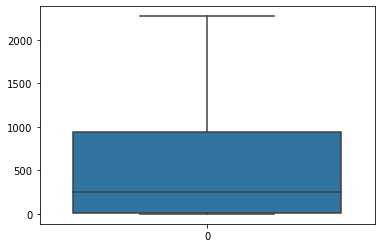

In [40]:
# Plotting a boxplot to check for outliers in the 'Total Time Spent on Website' column

sns.boxplot(data = Lead_df['Total Time Spent on Website'])
plt.show()

#### Observations -:
* There seem to be no outliers in the column

### The Data cleaning part ends here, now its time to move on to do some analysis on the processed data. 

# Step 3 - Data Analysis

In [41]:
# Let's get another look at the variables that we are left with

Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [42]:
# Just some visual improvements

sns.set_theme(style="darkgrid")

#Defining styling for plot titles and labels
title_font = {'family' : 'serif', 'color' :'blue', 'weight' : '5', 'size' : 20} 
label_font = {'family' : 'serif', 'color' :'purple', 'weight' : 5, 'size' : 15}

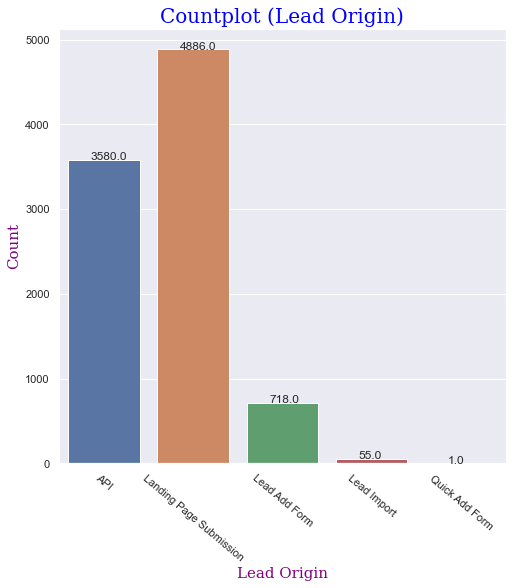

In [43]:
# Starting with Lead Origin

plt.figure(figsize = [8,8])

ax = sns.countplot(x = 'Lead Origin', data = Lead_df)
plt.title('Countplot (Lead Origin)', fontdict = title_font)
plt.xlabel('Lead Origin', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)
plt.xticks(rotation = -40)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.06))

plt.show()

#### Observations -: 
* "Landing Page Submission" is the origin identifier with the most lead count

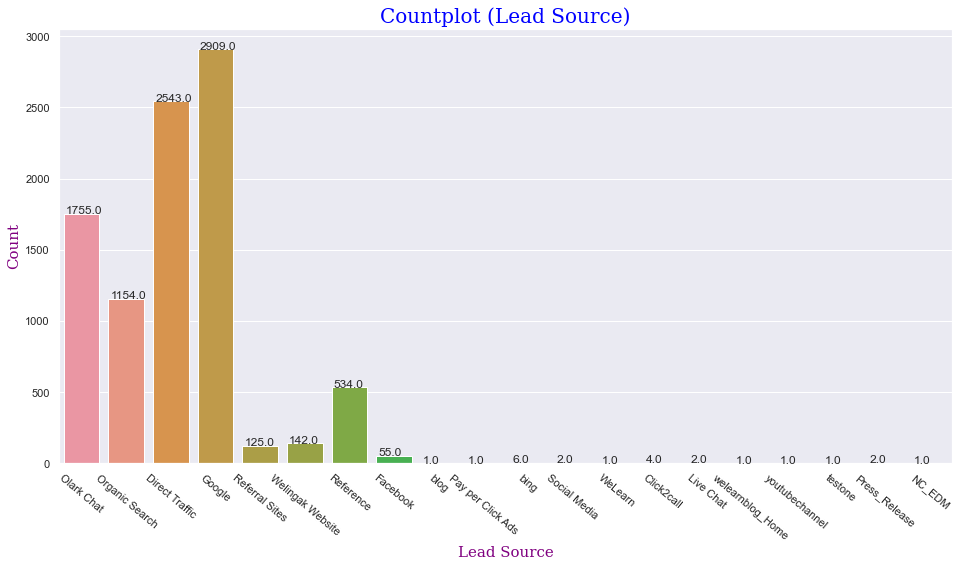

In [44]:
# Next up lets check Lead Source

plt.figure(figsize = [16,8])

ax = sns.countplot(x = 'Lead Source', data = Lead_df)
plt.title('Countplot (Lead Source)', fontdict = title_font)
plt.xlabel('Lead Source', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)
plt.xticks(rotation = -40)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.06))

plt.show()

#### Observations -:
* Google seems to be the most frequent lead source
* We might need to use the target variable "Converted" to get more information on this.

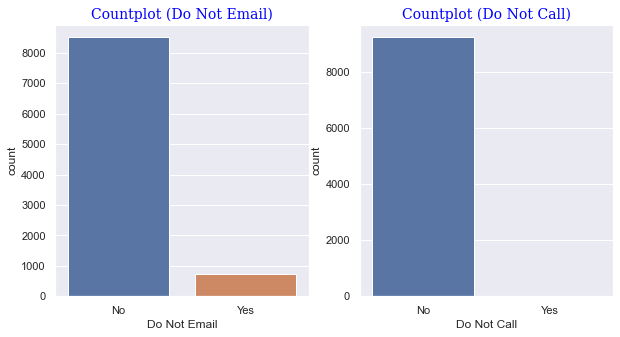

In [45]:
# Plotting "Do Not Email" and "Do Not Call" columns

plt.figure(figsize = [10,5])

plt.subplot(1,2,1)
sns.countplot(x = 'Do Not Email', data = Lead_df)
plt.title('Countplot (Do Not Email)', fontdict = title_font, fontsize = 14)

plt.subplot(1,2,2)
sns.countplot(x = 'Do Not Call', data = Lead_df)
plt.title('Countplot (Do Not Call)', fontdict = title_font, fontsize = 14)


plt.show()

#### There is not much to infer from this 

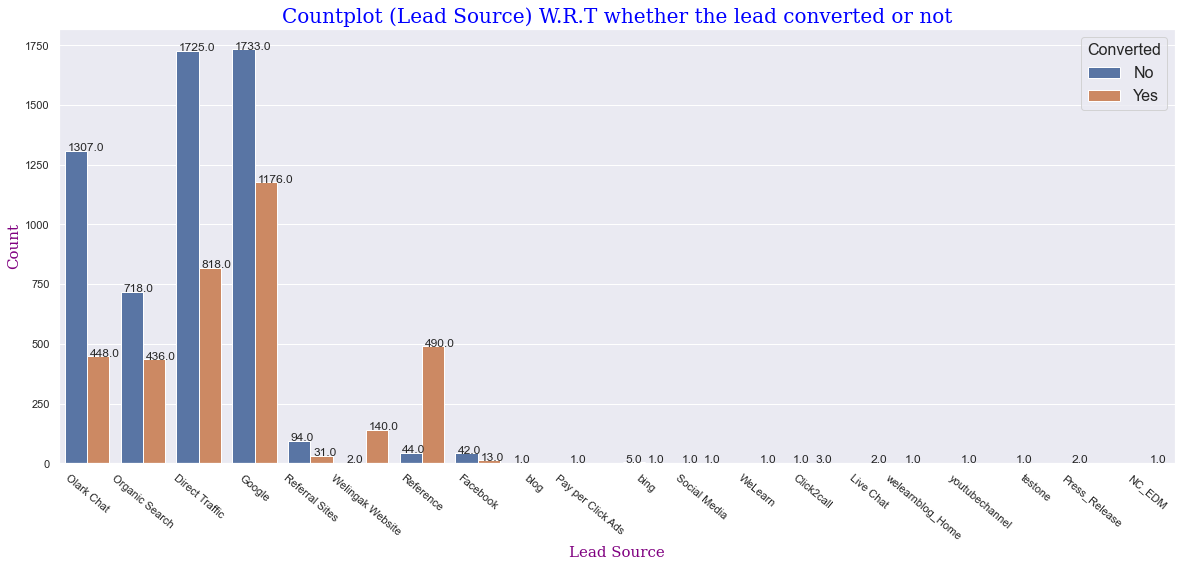

In [46]:
# Plotting Lead Source with respect to whether the lead converted or not

plt.figure(figsize = [20,8])

ax = sns.countplot(x = 'Lead Source',hue = 'Converted', data = Lead_df)
plt.title('Countplot (Lead Source) W.R.T whether the lead converted or not', fontdict = title_font)
plt.xlabel('Lead Source', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)
plt.xticks(rotation = -40)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.06))

plt.legend(labels = ['No', 'Yes'], loc = 'upper right',title = 'Converted', fontsize = 16, title_fontsize = 16)
plt.show()

#### Observations -:
* Still google has the highest frequency of leads converted to customers but
* "Reference" and "Welingak Website" seem to have a very good lead conversion rate compared to all the other categories

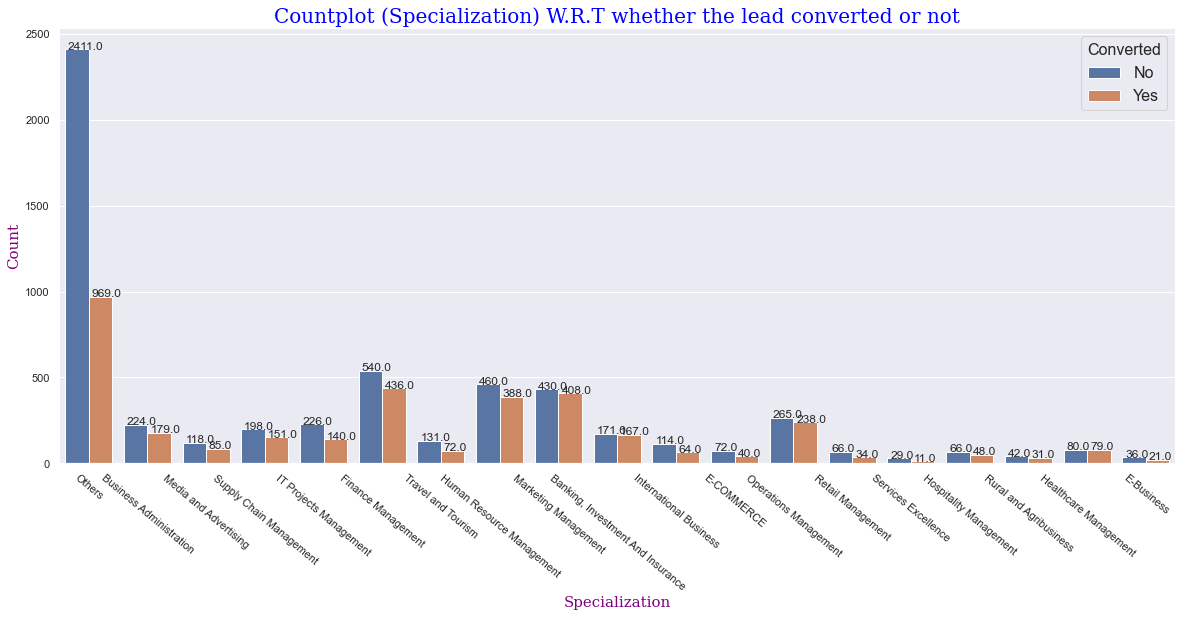

In [47]:
# Plotting Specialization with respect to whether the lead converted or not

plt.figure(figsize = [20,8])

ax = sns.countplot(x = 'Specialization',hue = 'Converted', data = Lead_df)
plt.title('Countplot (Specialization) W.R.T whether the lead converted or not', fontdict = title_font)
plt.xlabel('Specialization', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)
plt.xticks(rotation = -40)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.06))

plt.legend(labels = ['No', 'Yes'], loc = 'upper right',title = 'Converted', fontsize = 16, title_fontsize = 16)
plt.show()

#### Observation -:
* Clearly others category has the most number of leads so it having the most number of converted leads is not a big surprise
* Even though others category has the most number of converted leads the conversion rate on the other hand is not very fascinating in others category
* There are many other specialization categories have better conversion rate.

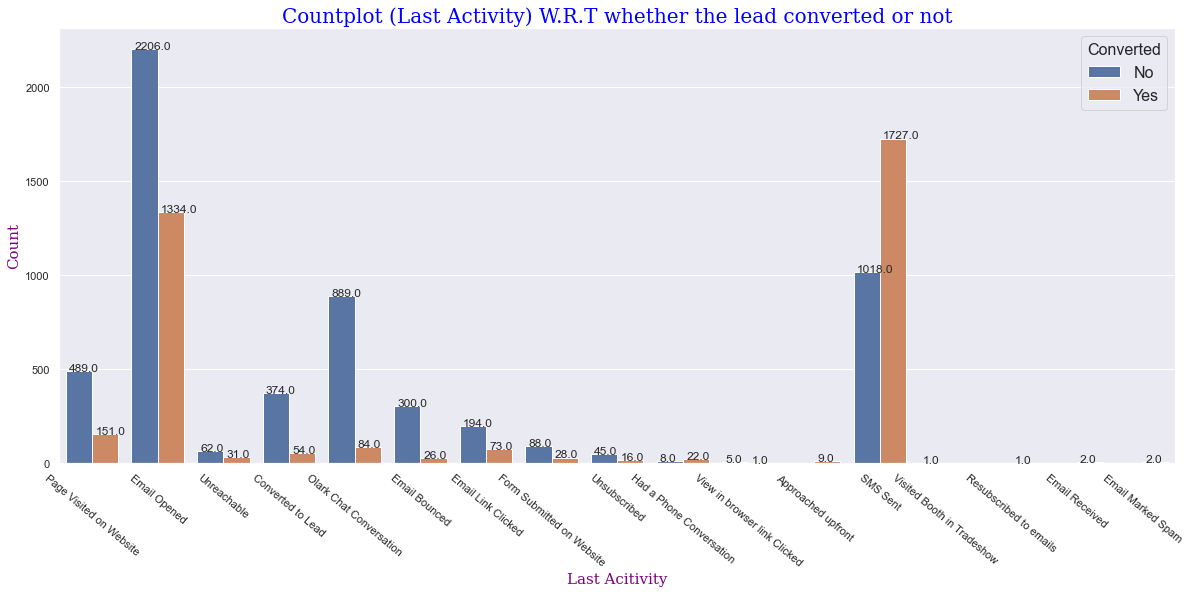

In [48]:
# Plotting Last Activity with respect to whether the lead converted or not

plt.figure(figsize = [20,8])

ax = sns.countplot(x = 'Last Activity',hue = 'Converted', data = Lead_df)
plt.title('Countplot (Last Activity) W.R.T whether the lead converted or not', fontdict = title_font)
plt.xlabel('Last Acitivity', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)
plt.xticks(rotation = -40)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.06))

plt.legend(labels = ['No', 'Yes'], loc = 'upper right',title = 'Converted', fontsize = 16, title_fontsize = 16)
plt.show()

#### Observations -:
* Cutomers who sent sms have a relatively higher conversion rate

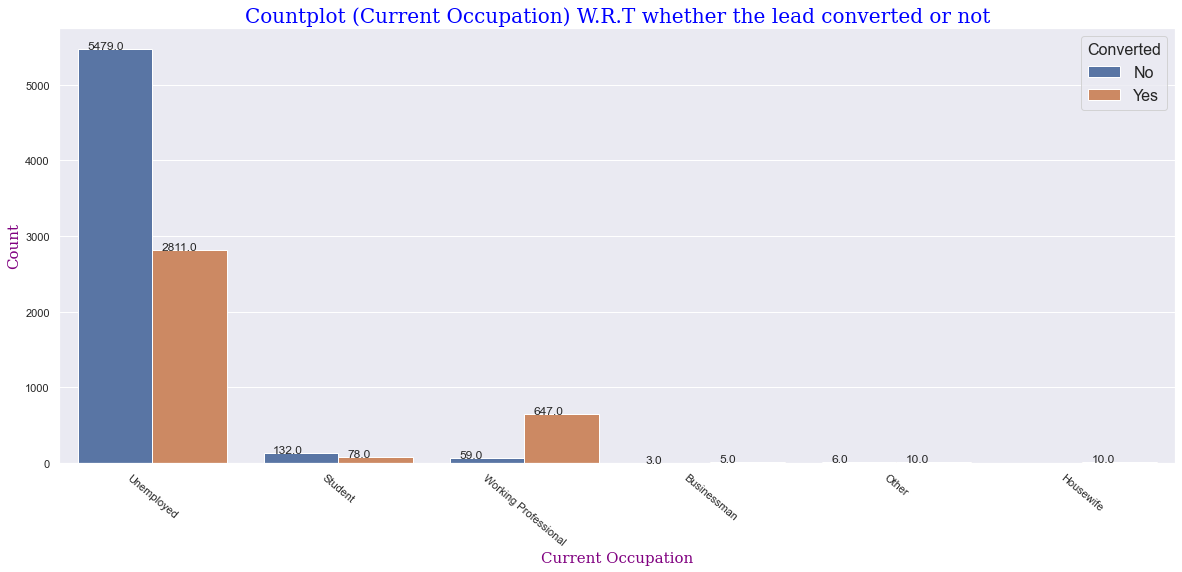

In [49]:
# Plotting Current occupation with respect to whether the lead converted or not

plt.figure(figsize = [20,8])

ax = sns.countplot(x = 'What is your current occupation',hue = 'Converted', data = Lead_df)
plt.title('Countplot (Current Occupation) W.R.T whether the lead converted or not', fontdict = title_font)
plt.xlabel('Current Occupation', fontdict = label_font)
plt.ylabel('Count', fontdict = label_font)
plt.xticks(rotation = -40)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.06))

plt.legend(labels = ['No', 'Yes'], loc = 'upper right',title = 'Converted', fontsize = 16, title_fontsize = 16)
plt.show()

#### Observations -:
* Clearly unemployed covers most of this column
* But there is something interesting as well, Working professionals have an exceptionally good lead to customer conversion rate

#### X--------------------------------------------------------------------------------------------------------------------------------------------X

### Note -: Now there is a group of variables that indicate whether the customer had seen the ad in any of them, the mentioned variables are -:
* Search
* Magazine
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement

### And a variable that indicated whether the customer came in through recommendations.
* Through Recommendations

# Step 4 - Data Preparation

#### Checking the value counts in some of the binary variables
* Do Not Call
* Do Not Email
* Receive More Updates About Our Courses
* Update me on Supply Chain Content  
* Get updates on DM Content   
* I agree to pay the amount through cheque 
* A free copy of Mastering The Interview

In [50]:
print(Lead_df['Do Not Call'].value_counts(),'\n\n',Lead_df['Do Not Email'].value_counts(),'\n\n',Lead_df['Update me on Supply Chain Content'].value_counts(),'\n\n',Lead_df['Get updates on DM Content'].value_counts(),'\n\n',Lead_df['I agree to pay the amount through cheque'].value_counts(),'\n\n',Lead_df['A free copy of Mastering The Interview'].value_counts(),'\n\n',Lead_df['Receive More Updates About Our Courses'].value_counts())

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

 No     8506
Yes     734
Name: Do Not Email, dtype: int64 

 No    9240
Name: Update me on Supply Chain Content, dtype: int64 

 No    9240
Name: Get updates on DM Content, dtype: int64 

 No    9240
Name: I agree to pay the amount through cheque, dtype: int64 

 No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 

 No    9240
Name: Receive More Updates About Our Courses, dtype: int64


#### Some of these columns have only one value so we are going to drop them

In [51]:
# Dropping single valued columns

Drop_1_val = ['Do Not Call','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Receive More Updates About Our Courses']

Lead_df.drop(Drop_1_val, axis = 1, inplace = True)

# Also dropping Prospect ID and Lead Number

Lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [52]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Search                                  9240 non-null   obje

In [53]:
# Converting some of the columns from 'yes', 'no' to 1, 0 respectively
# Listvariables to be converted 

binvars = ['Do Not Email','Search','A free copy of Mastering The Interview','Magazine', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement', 'Through Recommendations']

# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_df[binvars] = Lead_df[binvars].apply(binary_map)

In [54]:
# Creating dummy variables for the remaining categorical variables and dropping irrelevant levels.

# Creating dummy variables for the variable 'Lead Origin'
d1 = pd.get_dummies(Lead_df['Lead Origin'], prefix='Lead_Origin')
# Dropping Lead_Origin_Quick Add Form column
df1 = d1.drop(['Lead_Origin_Quick Add Form'], 1)
# Concatenating dataframes
Lead_df = pd.concat([Lead_df,df1], axis=1)

# Creating dummy variables for the variable 'Lead Source'.
d2 = pd.get_dummies(Lead_df['Lead Source'], prefix='Lead_Source')
# Dropping Lead_Source_NC_EDM
df2 = d2.drop(['Lead_Source_NC_EDM'], 1)
# Concatenating
Lead_df = pd.concat([Lead_df,df2], axis=1)

# Creating dummy variables for the variable 'Last Activity'.
d3 = pd.get_dummies(Lead_df['Last Activity'], prefix='Last_Activity')
# Dropping Last_Activity_Visited Booth in Tradeshow
df3 = d3.drop(['Last_Activity_Visited Booth in Tradeshow'], 1)
# Concatenating
Lead_df = pd.concat([Lead_df,df3], axis=1)

# Creating dummy variables for the variable 'Specialization'.
d4 = pd.get_dummies(Lead_df['Specialization'], prefix = 'Specialization')
# Dropping Specialization_Others
df4 = d4.drop(['Specialization_Others'], 1)
# Concatenating
Lead_df = pd.concat([Lead_df,df4], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'.
d5 = pd.get_dummies(Lead_df['What is your current occupation'], prefix='Current_Occupation')
# Dropping Current_Occupation_Other
df5 = d5.drop(['Current_Occupation_Other'], 1)
# Concatenating
Lead_df = pd.concat([Lead_df,df5], axis=1)

# Creating dummy variables for the variable 'Last Notable Activity'.
d5 = pd.get_dummies(Lead_df['Last Notable Activity'], prefix='Last_Notable_Activity')
# Dropping Last_Notable_Activity_View in browser link Clicked
df5 = d5.drop(['Last_Notable_Activity_View in browser link Clicked'], 1)
# Concatenating
Lead_df = pd.concat([Lead_df,df5], axis=1)

In [55]:
# Checking the resulting dataframe

Lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [56]:
# Dropping the repeating variables

drop_list = ['Lead Origin','Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Last Notable Activity']

Lead_df.drop(drop_list, axis = 1, inplace = True)

In [57]:
Lead_df.shape

(9240, 90)

# Step 5 - Splitting the data into Test and Train datasets

In [58]:
# Importing required modules

from sklearn.model_selection import train_test_split

In [59]:
# Storing the feature varaibles in X

X = Lead_df.drop(['Converted'], axis = 1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# Storing the target variable in y 

y = Lead_df.Converted

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Now splitting the data into training and test sets

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 6 - Feature Scaling

In [62]:
# Importing required module

from sklearn.preprocessing import StandardScaler

In [63]:
# Using standard scaler to scale the numerical variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Correlations

In [64]:
# Let's have a glance at the correlations 

Lead_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
Do Not Email,1.000000,-0.135580,0.033640,-0.046374,0.033404,-0.011443,NaN,-0.004322,-0.003056,-0.003056,...,-0.003056,-0.003056,-0.011443,0.117259,-0.013032,0.049921,-0.003056,-0.025990,-0.010505,0.243408
Converted,-0.135580,1.000000,0.029119,0.362483,-0.005068,-0.002261,NaN,0.003465,-0.008238,-0.008238,...,0.013138,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858
TotalVisits,0.033640,0.029119,1.000000,0.217341,0.512214,0.049577,NaN,0.033775,0.035756,0.014166,...,0.005530,-0.003106,0.022438,-0.106902,-0.037440,0.227865,-0.007424,-0.003163,0.005721,0.001068
Total Time Spent on Website,-0.046374,0.362483,0.217341,1.000000,0.314266,0.012654,NaN,0.011326,0.006195,0.025142,...,0.005189,-0.003810,0.022261,-0.106857,-0.051402,0.026644,-0.009259,0.125076,0.008941,0.000503
Page Views Per Visit,0.033404,-0.005068,0.512214,0.314266,1.000000,0.033348,NaN,0.023264,0.000691,0.004716,...,0.003116,-0.001733,0.014130,-0.096433,-0.087553,0.027158,-0.011431,0.056851,0.019723,0.018222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last_Notable_Activity_Page Visited on Website,0.049921,-0.036051,0.227865,0.026644,0.027158,0.007909,NaN,-0.002778,-0.001964,-0.001964,...,-0.001964,-0.001964,-0.007354,-0.144285,-0.026836,1.000000,-0.001964,-0.104656,-0.011129,-0.013499
Last_Notable_Activity_Resubscribed to emails,-0.003056,0.013138,-0.007424,-0.009259,-0.011431,-0.000405,NaN,-0.000153,-0.000108,-0.000108,...,-0.000108,-0.000108,-0.000405,-0.007951,-0.001479,-0.001964,1.000000,-0.005767,-0.000613,-0.000744
Last_Notable_Activity_SMS Sent,-0.025990,0.351845,-0.003163,0.125076,0.056851,-0.015032,NaN,-0.008157,-0.005767,-0.005767,...,-0.005767,-0.005767,-0.021594,-0.423664,-0.078798,-0.104656,-0.005767,1.000000,-0.032679,-0.039637
Last_Notable_Activity_Unreachable,-0.010505,0.036594,0.005721,0.008941,0.019723,-0.002296,NaN,-0.000867,-0.000613,-0.000613,...,-0.000613,-0.000613,-0.002296,-0.045054,-0.008380,-0.011129,-0.000613,-0.032679,1.000000,-0.004215


In [65]:
# Let's check what's going on with magazine column

Lead_df.Magazine.value_counts()

0    9240
Name: Magazine, dtype: int64

#### So magazine only has one value i.e. no , so dropping it would be a good option

In [66]:
Lead_df.drop('Magazine', axis = 1, inplace = True)

In [67]:
Lead_df.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed
Do Not Email,1.000000,-0.135580,0.033640,-0.046374,0.033404,-0.011443,-0.004322,-0.003056,-0.003056,-0.006113,...,-0.003056,-0.003056,-0.011443,0.117259,-0.013032,0.049921,-0.003056,-0.025990,-0.010505,0.243408
Converted,-0.135580,1.000000,0.029119,0.362483,-0.005068,-0.002261,0.003465,-0.008238,-0.008238,-0.005789,...,0.013138,-0.008238,0.043476,-0.244294,-0.072660,-0.036051,0.013138,0.351845,0.036594,-0.012858
TotalVisits,0.033640,0.029119,1.000000,0.217341,0.512214,0.049577,0.033775,0.035756,0.014166,0.024018,...,0.005530,-0.003106,0.022438,-0.106902,-0.037440,0.227865,-0.007424,-0.003163,0.005721,0.001068
Total Time Spent on Website,-0.046374,0.362483,0.217341,1.000000,0.314266,0.012654,0.011326,0.006195,0.025142,0.007607,...,0.005189,-0.003810,0.022261,-0.106857,-0.051402,0.026644,-0.009259,0.125076,0.008941,0.000503
Page Views Per Visit,0.033404,-0.005068,0.512214,0.314266,1.000000,0.033348,0.023264,0.000691,0.004716,0.021993,...,0.003116,-0.001733,0.014130,-0.096433,-0.087553,0.027158,-0.011431,0.056851,0.019723,0.018222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last_Notable_Activity_Page Visited on Website,0.049921,-0.036051,0.227865,0.026644,0.027158,0.007909,-0.002778,-0.001964,-0.001964,-0.003929,...,-0.001964,-0.001964,-0.007354,-0.144285,-0.026836,1.000000,-0.001964,-0.104656,-0.011129,-0.013499
Last_Notable_Activity_Resubscribed to emails,-0.003056,0.013138,-0.007424,-0.009259,-0.011431,-0.000405,-0.000153,-0.000108,-0.000108,-0.000217,...,-0.000108,-0.000108,-0.000405,-0.007951,-0.001479,-0.001964,1.000000,-0.005767,-0.000613,-0.000744
Last_Notable_Activity_SMS Sent,-0.025990,0.351845,-0.003163,0.125076,0.056851,-0.015032,-0.008157,-0.005767,-0.005767,0.013002,...,-0.005767,-0.005767,-0.021594,-0.423664,-0.078798,-0.104656,-0.005767,1.000000,-0.032679,-0.039637
Last_Notable_Activity_Unreachable,-0.010505,0.036594,0.005721,0.008941,0.019723,-0.002296,-0.000867,-0.000613,-0.000613,-0.001227,...,-0.000613,-0.000613,-0.002296,-0.045054,-0.008380,-0.011129,-0.000613,-0.032679,1.000000,-0.004215


#### Observations -:
* Since we have 89 columns checking correlations like this would be a lot of work so let's rely on rfe for further feature elimination.

# Step 7 - Model Building

In [68]:
# Importing required package

import statsmodels.api as sm

In [69]:
# Building a logistic regression model
# Model iter - 1

lead_log_1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
lead_log_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 08 Dec 2021   Deviance:                   1.7352e+05
Time:                        19:30:53   Pearson chi2:                 8.48e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             2.682e+15   1.08e+08   2.47e+07      0.000    2.68e+15    2.68e+15
Do Not Email                                     -1.163e+14   4.44e+06  -2.62e+07      0.000   -1.16e+14   -1.16e+14
TotalVisits                                       6.377e+13   9.96e+05    6.4e+07      0.000    6.38e+13    6.38e+13
Total Time Spent on Website                       7.245e+14   9.53e+05   7.61e+08      0.000    7.25e+14    7.25e+14
Page Views Per Visit                             -1.139e+14    1.2e+06  -9.49e+07      0.000   -1.14e+14   -1.14e+14
Search                                           -6.036e+13   2.21e+07  -2.73e+06      0.000   -6.04e+13   -6.04e+13
Magazine                                           182.6444   2.04e-06   8.94e+07      0.000     182.644     182.644
Newspaper Article                                 4.651e+15   6.73e+07   6.91e+07      0.000    4.65e+15    4.65e+15
X Education Forums                               -6.473e+15   1.11e+08  -5.81e+07      0.000   -6.47e+15   -6.47e+15
Newspaper                                        -7.083e+15   6.73e+07  -1.05e+08      0.000   -7.08e+15   -7.08e+15
Digital Advertisement                            -2.662e+15   4.77e+07  -5.59e+07      0.000   -2.66e+15   -2.66e+15
Through Recommendations                           2.924e+14   2.86e+07   1.02e+07      0.000    2.92e+14    2.92e+14
A free copy of Mastering The Interview           -1.949e+14   2.67e+06  -7.31e+07      0.000   -1.95e+14   -1.95e+14
Lead_Origin_API                                  -2.741e+15   6.78e+07  -4.04e+07      0.000   -2.74e+15   -2.74e+15
Lead_Origin_Landing Page Submission              -3.105e+15   6.78e+07  -4.58e+07      0.000    -3.1e+15    -3.1e+15
Lead_Origin_Lead Add Form                        -4.568e+14    6.9e+07  -6.62e+06      0.000   -4.57e+14   -4.57e+14
Lead_Origin_Lead Import                          -3.486e+15    8.3e+07   -4.2e+07      0.000   -3.49e+15   -3.49e+15
Lead_Source_Click2call                            -4.64e+15   7.86e+07   -5.9e+07      0.000   -4.64e+15   -4.64e+15
Lead_Source_Direct Traffic                       -3.523e+15   6.72e+07  -5.24e+07      0.000   -3.52e+15   -3.52e+15
Lead_Source_Facebook                             -2.729e+15   8.26e+07  -3.31e+07      0.000   -2.73e+15   -2.73e+15
Lead_Source_Google                               -3.481e+15   6.72e+07  -5.18e+07      0.000   -3.48e+15   -3.48e+15
Lead_Source_Live Chat                             5.012e+14   8.33e+07   6.02e+06      0.000    5.01e+14    5.01e+14
Lead_Source_Olark Chat                           -2.825e+15   6.73e+07   -4.2e+07      0.000   -2.82e+15   -2.82e+15
Lead_Source_Organic Search               

# Step 8 - Feature Elimination/Selection using RFE

In [70]:
# Importing required modules

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Creating an object of LogisticRegression

lr = LogisticRegression()

In [71]:
rfe = RFE(lr, 20) # number of features to be selected
rfe = rfe.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # Checking which columns are good to go

[('Do Not Email', True, 1),
 ('TotalVisits', False, 54),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 55),
 ('Search', False, 45),
 ('Magazine', False, 69),
 ('Newspaper Article', False, 22),
 ('X Education Forums', False, 49),
 ('Newspaper', False, 10),
 ('Digital Advertisement', False, 21),
 ('Through Recommendations', False, 39),
 ('A free copy of Mastering The Interview', False, 56),
 ('Lead_Origin_API', False, 19),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 38),
 ('Lead_Source_Click2call', False, 27),
 ('Lead_Source_Direct Traffic', False, 40),
 ('Lead_Source_Facebook', False, 18),
 ('Lead_Source_Google', False, 43),
 ('Lead_Source_Live Chat', False, 58),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 42),
 ('Lead_Source_Pay per Click Ads', False, 57),
 ('Lead_Source_Press_Release', False, 60),
 ('Lead_Source_Reference', False, 66),
 ('L

In [73]:
# Storing columns selected by rfe

sel_cols = X_train.columns[rfe.support_] 

In [74]:
# These are the eliminated columns

X_train.columns[~rfe.support_] 

Index(['TotalVisits', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Lead Import', 'Lead_Source_Click2call',
       'Lead_Source_Direct Traffic', 'Lead_Source_Facebook',
       'Lead_Source_Google', 'Lead_Source_Live Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Pay per Click Ads',
       'Lead_Source_Press_Release', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Social Media',
       'Lead_Source_WeLearn', 'Lead_Source_bing', 'Lead_Source_blog',
       'Lead_Source_testone', 'Lead_Source_welearnblog_Home',
       'Lead_Source_youtubechannel', 'Last_Activity_Converted to Lead',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Marked Spam', 'Last_Activity_Email Opened',
       'Last_Activity

# -----------------------------------------------------------------------------------------------------------

## Rebuilding the model with RFE selected columns

In [75]:
# Model iter - 2

X_train_sm = sm.add_constant(X_train[sel_cols])
lead_log_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lead_log_2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.1
Date:                Wed, 08 Dec 2021   Deviance:                       5352.3
Time:                        19:30:56   Pearson chi2:                 7.10e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.0533      0.085    -12.438      0.000      -1.219      -0.887
Do Not Email                                        -1.2377      0.166     -7.448      0.000      -1.563      -0.912
Total Time Spent on Website                          1.1007      0.039     27.870      0.000       1.023       1.178
Lead_Origin_Landing Page Submission                 -0.4131      0.091     -4.516      0.000      -0.592      -0.234
Lead_Origin_Lead Add Form                            3.4854      0.200     17.398      0.000       3.093       3.878
Lead_Source_Olark Chat                               0.9537      0.119      8.030      0.000       0.721       1.186
Lead_Source_Welingak Website                         1.9563      0.742      2.635      0.008       0.501       3.411
Last_Activity_Approached upfront                    23.8089   2.66e+04      0.001      0.999   -5.22e+04    5.22e+04
Last_Activity_Had a Phone Conversation               1.1293      0.958      1.178      0.239      -0.749       3.008
Last_Activity_Olark Chat Conversation               -0.9086      0.171     -5.324      0.000      -1.243      -0.574
Last_Activity_SMS Sent                               1.2590      0.074     17.038      0.000       1.114       1.404
Specialization_Banking, Investment And Insurance     0.4350      0.185      2.351      0.019       0.072       0.798
Specialization_E-COMMERCE                            0.4855      0.289      1.679      0.093      -0.081       1.052
Specialization_Finance Management                    0.4143      0.114      3.624      0.000       0.190       0.638
Specialization_IT Projects Management                0.4430      0.186      2.380      0.017       0.078       0.808
Specialization_Rural and Agribusiness                0.8810      0.389      2.262      0.024       0.118       1.644
Current_Occupation_Housewife                        24.2743   2.19e+04      0.001      0.999   -4.29e+04    4.29e+04
Current_Occupation_Working Professional              2.8249      0.189     14.944      0.000       2.454       3.195
Last_Notable_Activity_Had a Phone Conversation       2.3093      1.458      1.583      0.113      -0.549       5.168
Last_Notable_Activity_Modified                      -0.8939      0.081    -11.097      0.000      -1.052      -0.736
Last_Notable_Activity_Unreachable                    1.5271      0.523      2.918      0.004       0.501       2.553
====================================================================================================================
"""

In [76]:
# checking the predicted values of 'converted' on the train set

y_train_pred = result.predict(X_train_sm)
y_train_pred.head(10)

1871    0.254619
6795    0.188455
3516    0.297204
8105    0.785042
3934    0.122605
4844    0.990697
3297    0.199619
8071    0.994539
987     0.217506
7423    0.915215
dtype: float64

In [77]:
# creating an array of the predicted values so that we can create a dataframe of actual converted values and the probability of conversion

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2546188 , 0.18845487, 0.29720424, 0.78504232, 0.1226053 ,
       0.99069666, 0.19961923, 0.99453938, 0.21750575, 0.91521535])

In [78]:
# Creating a new dataframe to store the actual value of converted leads and predicted probability

y_train_pred_df = pd.DataFrame({'Converted': y_train.values, 'Conversion_prob': y_train_pred})
y_train_pred_df['Lead_ID'] = y_train.index
y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID
0,0,0.254619,1871
1,0,0.188455,6795
2,0,0.297204,3516
3,0,0.785042,8105
4,0,0.122605,3934


In [79]:
# Creating a column predicted with value 1 if conversion_prob is > 0.5 and 0 if it is < 0.5

y_train_pred_df['predicted_conversion'] = y_train_pred_df.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID,predicted_conversion
0,0,0.254619,1871,0
1,0,0.188455,6795,0
2,0,0.297204,3516,0
3,0,0.785042,8105,1
4,0,0.122605,3934,0


#### Checking the accuracy of the model

In [80]:
# Importing required modules

from sklearn import metrics

In [81]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion )
print(confusion)

[[3544  458]
 [ 740 1726]]


In [82]:
# Predicted       not_converted    converted
# Actual
# not_converted        3544          458
# converted            740           1726 

In [83]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion))

0.8147804576376005


### Let's check the VIF's and look for any columns with high VIF values, in this case if the VIF is higher than 5 we are going to drop the columns and re-run the model and check it's accuracy again

In [84]:
# Importing required modules

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# The code section below creates a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[sel_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[sel_cols].values, i) for i in range(X_train[sel_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last_Activity_Had a Phone Conversation,2.03
17,Last_Notable_Activity_Had a Phone Conversation,2.01
2,Lead_Origin_Landing Page Submission,1.96
18,Last_Notable_Activity_Modified,1.65
4,Lead_Source_Olark Chat,1.61
8,Last_Activity_Olark Chat Conversation,1.55
3,Lead_Origin_Lead Add Form,1.52
9,Last_Activity_SMS Sent,1.45
5,Lead_Source_Welingak Website,1.24
1,Total Time Spent on Website,1.24


#### Observations -:
* Surprisingly the VIF values of all the columns are pretty low which means there is not much multicollinearity going on with these variables
* We cannot drop any variables at this point as all the VIF values are below the tolerable cutoff

### Instead let's look for features with high p-values

In [86]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.1
Date:                Wed, 08 Dec 2021   Deviance:                       5352.3
Time:                        19:30:56   Pearson chi2:                 7.10e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.0533      0.085    -12.438      0.000      -1.219      -0.887
Do Not Email                                        -1.2377      0.166     -7.448      0.000      -1.563      -0.912
Total Time Spent on Website                          1.1007      0.039     27.870      0.000       1.023       1.178
Lead_Origin_Landing Page Submission                 -0.4131      0.091     -4.516      0.000      -0.592      -0.234
Lead_Origin_Lead Add Form                            3.4854      0.200     17.398      0.000       3.093       3.878
Lead_Source_Olark Chat                               0.9537      0.119      8.030      0.000       0.721       1.186
Lead_Source_Welingak Website                         1.9563      0.742      2.635      0.008       0.501       3.411
Last_Activity_Approached upfront                    23.8089   2.66e+04      0.001      0.999   -5.22e+04    5.22e+04
Last_Activity_Had a Phone Conversation               1.1293      0.958      1.178      0.239      -0.749       3.008
Last_Activity_Olark Chat Conversation               -0.9086      0.171     -5.324      0.000      -1.243      -0.574
Last_Activity_SMS Sent                               1.2590      0.074     17.038      0.000       1.114       1.404
Specialization_Banking, Investment And Insurance     0.4350      0.185      2.351      0.019       0.072       0.798
Specialization_E-COMMERCE                            0.4855      0.289      1.679      0.093      -0.081       1.052
Specialization_Finance Management                    0.4143      0.114      3.624      0.000       0.190       0.638
Specialization_IT Projects Management                0.4430      0.186      2.380      0.017       0.078       0.808
Specialization_Rural and Agribusiness                0.8810      0.389      2.262      0.024       0.118       1.644
Current_Occupation_Housewife                        24.2743   2.19e+04      0.001      0.999   -4.29e+04    4.29e+04
Current_Occupation_Working Professional              2.8249      0.189     14.944      0.000       2.454       3.195
Last_Notable_Activity_Had a Phone Conversation       2.3093      1.458      1.583      0.113      -0.549       5.168
Last_Notable_Activity_Modified                      -0.8939      0.081    -11.097      0.000      -1.052      -0.736
Last_Notable_Activity_Unreachable                    1.5271      0.523      2.918      0.004       0.501       2.553
====================================================================================================================
"""

#### Observations -:
* Clearly there are some columns with exceptionally high p values which does make them insignificant.

# -----------------------------------------------------------------------------------------------------------

In [87]:
# Dropping Last_Activity_Approached upfront and rebuilding the model

sel_cols = sel_cols.drop('Last_Activity_Approached upfront', 1)
sel_cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_Had a Phone Conversation',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_IT Projects Management',
       'Specialization_Rural and Agribusiness', 'Current_Occupation_Housewife',
       'Current_Occupation_Working Professional',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Modified', 'Last_Notable_Activity_Unreachable'],
      dtype='object')

In [88]:
# Model iter - 3

X_train_sm = sm.add_constant(X_train[sel_cols])
lead_log_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lead_log_3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.7
Date:                Wed, 08 Dec 2021   Deviance:                       5361.4
Time:                        19:30:56   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.0553      0.085    -12.462      0.000      -1.221      -0.889
Do Not Email                                        -1.2430      0.166     -7.481      0.000      -1.569      -0.917
Total Time Spent on Website                          1.1025      0.039     27.929      0.000       1.025       1.180
Lead_Origin_Landing Page Submission                 -0.4087      0.091     -4.471      0.000      -0.588      -0.230
Lead_Origin_Lead Add Form                            3.4978      0.200     17.490      0.000       3.106       3.890
Lead_Source_Olark Chat                               0.9629      0.119      8.114      0.000       0.730       1.196
Lead_Source_Welingak Website                         1.9453      0.742      2.621      0.009       0.490       3.400
Last_Activity_Had a Phone Conversation               1.1154      0.959      1.163      0.245      -0.764       2.994
Last_Activity_Olark Chat Conversation               -0.9204      0.171     -5.396      0.000      -1.255      -0.586
Last_Activity_SMS Sent                               1.2549      0.074     16.991      0.000       1.110       1.400
Specialization_Banking, Investment And Insurance     0.4315      0.185      2.332      0.020       0.069       0.794
Specialization_E-COMMERCE                            0.4819      0.289      1.668      0.095      -0.084       1.048
Specialization_Finance Management                    0.4102      0.114      3.589      0.000       0.186       0.634
Specialization_IT Projects Management                0.4404      0.186      2.366      0.018       0.076       0.805
Specialization_Rural and Agribusiness                0.8766      0.390      2.251      0.024       0.113       1.640
Current_Occupation_Housewife                        23.2650   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_Occupation_Working Professional              2.8207      0.189     14.927      0.000       2.450       3.191
Last_Notable_Activity_Had a Phone Conversation       2.3234      1.459      1.593      0.111      -0.535       5.182
Last_Notable_Activity_Modified                      -0.8822      0.080    -10.981      0.000      -1.040      -0.725
Last_Notable_Activity_Unreachable                    1.5280      0.523      2.920      0.004       0.502       2.554
====================================================================================================================
"""

In [89]:
# Getting probability values

y_train_pred = result.predict(X_train_sm).values.reshape(-1)

In [90]:
# Storing probabilities into the dataframe

y_train_pred_df['Conversion_prob'] = y_train_pred

In [91]:
# Updating 'predicted_conversion' with 1 if Conversion_prob > 0.5 else 0

y_train_pred_df['predicted_conversion'] = y_train_pred_df.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID,predicted_conversion
0,0,0.255686,1871,0
1,0,0.188825,6795,0
2,0,0.298453,3516,0
3,0,0.785186,8105,1
4,0,0.124477,3934,0


In [92]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion )
print(confusion)

[[3541  461]
 [ 741 1725]]


In [93]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion))

0.8141620284477428


#### The accuracy  is almost unaffected by the removal of the column

# -----------------------------------------------------------------------------------------------------------

In [94]:
# Let's try dropping another column with high p value i.e. Current_Occupation_Housewife

sel_cols = sel_cols.drop('Current_Occupation_Housewife')

In [95]:
# Model iter - 4

X_train_sm = sm.add_constant(X_train[sel_cols])
lead_log_4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = lead_log_4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2689.2
Date:                Wed, 08 Dec 2021   Deviance:                       5378.5
Time:                        19:30:56   Pearson chi2:                 7.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.0526      0.085    -12.444      0.000      -1.218      -0.887
Do Not Email                                        -1.2498      0.166     -7.525      0.000      -1.575      -0.924
Total Time Spent on Website                          1.1010      0.039     27.937      0.000       1.024       1.178
Lead_Origin_Landing Page Submission                 -0.3987      0.091     -4.369      0.000      -0.578      -0.220
Lead_Origin_Lead Add Form                            3.5178      0.200     17.629      0.000       3.127       3.909
Lead_Source_Olark Chat                               0.9618      0.119      8.112      0.000       0.729       1.194
Lead_Source_Welingak Website                         1.9239      0.742      2.592      0.010       0.469       3.379
Last_Activity_Had a Phone Conversation               1.1027      0.959      1.150      0.250      -0.776       2.982
Last_Activity_Olark Chat Conversation               -0.9271      0.170     -5.438      0.000      -1.261      -0.593
Last_Activity_SMS Sent                               1.2462      0.074     16.896      0.000       1.102       1.391
Specialization_Banking, Investment And Insurance     0.4233      0.185      2.290      0.022       0.061       0.786
Specialization_E-COMMERCE                            0.4734      0.289      1.640      0.101      -0.092       1.039
Specialization_Finance Management                    0.4075      0.114      3.579      0.000       0.184       0.631
Specialization_IT Projects Management                0.4320      0.186      2.324      0.020       0.068       0.796
Specialization_Rural and Agribusiness                0.8669      0.389      2.227      0.026       0.104       1.630
Current_Occupation_Working Professional              2.8124      0.189     14.893      0.000       2.442       3.183
Last_Notable_Activity_Had a Phone Conversation       2.3273      1.458      1.596      0.111      -0.531       5.186
Last_Notable_Activity_Modified                      -0.8764      0.080    -10.937      0.000      -1.034      -0.719
Last_Notable_Activity_Unreachable                    1.5207      0.523      2.907      0.004       0.495       2.546
====================================================================================================================
"""

In [96]:
y_train_pred = result.predict(X_train_sm).values.reshape(-1)

y_train_pred_df['Conversion_prob'] = y_train_pred

In [97]:
# Updating 'predicted_conversion' with 1 if Conversion_prob > 0.5 else 0

y_train_pred_df['predicted_conversion'] = y_train_pred_df.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID,predicted_conversion
0,0,0.256243,1871,0
1,0,0.190770,6795,0
2,0,0.299002,3516,0
3,0,0.785486,8105,1
4,0,0.125425,3934,0


In [98]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion )
print(confusion)

[[3540  462]
 [ 743 1723]]


In [99]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion))

0.8136982065553494


#### Again the accuracy value hasn't changed much

# -----------------------------------------------------------------------------------------------------------

In [100]:
# Next let's try dropping Last_Activity_Had a Phone Conversation

sel_cols = sel_cols.drop('Last_Activity_Had a Phone Conversation')

In [101]:
# Model iter - 5

X_train_sm = sm.add_constant(X_train[sel_cols])
lead_log_5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = lead_log_5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.0
Date:                Wed, 08 Dec 2021   Deviance:                       5379.9
Time:                        19:30:56   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.0512      0.085    -12.433      0.000      -1.217      -0.886
Do Not Email                                        -1.2518      0.166     -7.534      0.000      -1.577      -0.926
Total Time Spent on Website                          1.1019      0.039     27.964      0.000       1.025       1.179
Lead_Origin_Landing Page Submission                 -0.3998      0.091     -4.382      0.000      -0.579      -0.221
Lead_Origin_Lead Add Form                            3.5229      0.200     17.655      0.000       3.132       3.914
Lead_Source_Olark Chat                               0.9610      0.119      8.107      0.000       0.729       1.193
Lead_Source_Welingak Website                         1.9172      0.742      2.583      0.010       0.463       3.372
Last_Activity_Olark Chat Conversation               -0.9316      0.170     -5.466      0.000      -1.266      -0.598
Last_Activity_SMS Sent                               1.2443      0.074     16.873      0.000       1.100       1.389
Specialization_Banking, Investment And Insurance     0.4221      0.185      2.283      0.022       0.060       0.784
Specialization_E-COMMERCE                            0.4750      0.289      1.644      0.100      -0.091       1.041
Specialization_Finance Management                    0.4057      0.114      3.563      0.000       0.183       0.629
Specialization_IT Projects Management                0.4347      0.186      2.342      0.019       0.071       0.799
Specialization_Rural and Agribusiness                0.8654      0.389      2.223      0.026       0.103       1.628
Current_Occupation_Working Professional              2.8181      0.189     14.937      0.000       2.448       3.188
Last_Notable_Activity_Had a Phone Conversation       3.4303      1.099      3.121      0.002       1.276       5.585
Last_Notable_Activity_Modified                      -0.8708      0.080    -10.891      0.000      -1.028      -0.714
Last_Notable_Activity_Unreachable                    1.5211      0.523      2.907      0.004       0.496       2.547
====================================================================================================================
"""

In [102]:
y_train_pred = result.predict(X_train_sm).values.reshape(-1)

y_train_pred_df['Conversion_prob'] = y_train_pred

In [103]:
# Updating 'predicted_conversion' with 1 if Conversion_prob > 0.5 else 0

y_train_pred_df['predicted_conversion'] = y_train_pred_df.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID,predicted_conversion
0,0,0.256187,1871,0
1,0,0.190821,6795,0
2,0,0.298981,3516,0
3,0,0.785444,8105,1
4,0,0.126009,3934,0


In [104]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion)
confusion

array([[3541,  461],
       [ 745, 1721]], dtype=int64)

In [105]:
# Accuracy

print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted_conversion))

0.813543599257885


### Let's make this our final model and check some other metric values as well

## 8.1 Checking how our model perform using some other metrics

In [106]:
# Using the final iteration of the model i.e. 6, calculating sensitivity, specificity ,etc.

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Sensitivity

TP / float(TP+FN)

0.6978913219789132

In [108]:
# Specificity

TN / float(TN+FP)

0.8848075962018991

In [109]:
# Calculating false postive rate - predicting converted when lead did not convert

print(FP/ float(TN+FP))

0.11519240379810095


In [110]:
# positive predictive value 

print (TP / float(TP+FP))

0.7887259395050412


In [111]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8261782547830144


### All the above values indicate that the final model is a good enough model

# Step 9 - ROC Curve

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Conversion_prob, drop_intermediate = False )

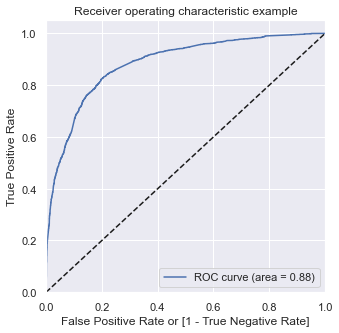

In [114]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Conversion_prob)

# Step 10 - Optimal Cut-off

In [115]:
# Let's create columns with different probability cutoffs 
cutoffs = [float(x/10) for x in range(10)]

for i in cutoffs:
    y_train_pred_df[i] = y_train_pred_df.Conversion_prob.map(lambda x: 1 if x > i else 0)

y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID,predicted_conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.256187,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.190821,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.298981,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.785444,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.126009,3934,0,1,1,0,0,0,0,0,0,0,0


In [116]:
# Calculating accuracy, sensitivity and specificity for different probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cut_off = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cut_off:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.595702     0.968370     0.366067
0.2   0.2  0.741960     0.914436     0.635682
0.3   0.3  0.804886     0.838200     0.784358
0.4   0.4  0.818491     0.761963     0.853323
0.5   0.5  0.813544     0.697891     0.884808
0.6   0.6  0.794991     0.589619     0.921539
0.7   0.7  0.783550     0.518654     0.946777
0.8   0.8  0.762678     0.425385     0.970515
0.9   0.9  0.715832     0.273723     0.988256


### 0.3 seems to have accuracy ,sensitivity and specificity balanced which is a good thing

In [117]:
metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[0.3])

array([[3139,  863],
       [ 399, 2067]], dtype=int64)

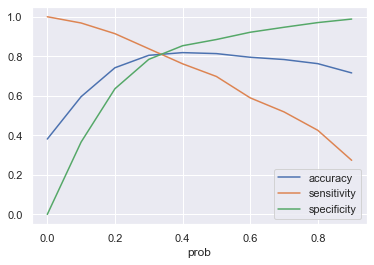

In [118]:
# Plotting accuracy, sensitivity and specificity for different probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Observations -:
* The curve clearly shows 0.3 is the optimal point to choose as a cutoff

In [119]:
y_train_pred_df['final_predicted_value'] = y_train_pred_df.Conversion_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_df.head()

,Converted,Conversion_prob,Lead_ID,predicted_conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted_value
0,0,0.256187,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.190821,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.298981,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.785444,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.126009,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [120]:
# Calculating the lead score for training set

y_train_pred_df['lead_score'] = y_train_pred_df.Conversion_prob.map(lambda x: round(x*100))
y_train_pred_df.head(10)

,Converted,Conversion_prob,Lead_ID,predicted_conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted_value,lead_score
0,0,0.256187,1871,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.190821,6795,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.298981,3516,0,1,1,1,0,0,0,0,0,0,0,0,30
3,0,0.785444,8105,1,1,1,1,1,1,1,1,1,0,0,1,79
4,0,0.126009,3934,0,1,1,0,0,0,0,0,0,0,0,0,13
5,1,0.990661,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.199442,3297,0,1,1,0,0,0,0,0,0,0,0,0,20
7,1,0.984185,8071,1,1,1,1,1,1,1,1,1,1,1,1,98
8,0,0.221935,987,0,1,1,1,0,0,0,0,0,0,0,0,22
9,1,0.914421,7423,1,1,1,1,1,1,1,1,1,1,1,1,91


In [121]:
# Checking the overall accuracy once again.

metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted_value)

0.8048855905998763

In [122]:
# Creating the final confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted_value )
confusion_2

array([[3139,  863],
       [ 399, 2067]], dtype=int64)

In [123]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [124]:
# Sensitivity

TP / float(TP+FN)

0.8381995133819952

In [125]:
# Specificity

TN / float(TN+FP)

0.7843578210894553

In [126]:
# Calculating false postive rate - predicting converted when lead did not convert

print(FP/ float(TN+FP))

0.21564217891054474


In [127]:
# positive predictive value 

print (TP / float(TP+FP))

0.7054607508532423


In [128]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8872244205765969


## 10.2 - Precision and Recall

In [129]:
# Importing required modules

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [130]:
# Precision

precision_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted_value)

0.7054607508532423

In [131]:
# Recall

recall_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted_value)

0.8381995133819952

### Precision and recall tradeoff

In [132]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Conversion_prob)

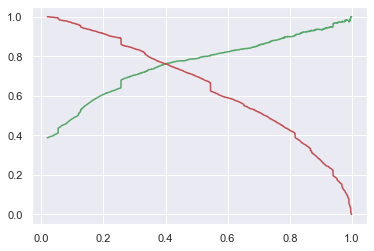

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11 - Making predictions on the test set

In [134]:
# Scaling numerical variables in test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [135]:
X_test = X_test[sel_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_IT Projects Management,Specialization_Rural and Agribusiness,Current_Occupation_Working Professional,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Unreachable
4269,0,0.964504,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
9199,0,-0.885371,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

In [137]:
# Making predictions

y_test_pred = result.predict(X_test_sm)

In [138]:
# Converting y_pred to a dataframe which is an array

y_pred_df = pd.DataFrame(y_test_pred)

In [139]:
y_pred_df.head()

,0
4269,0.778314
2376,0.939361
7766,0.919183
9199,0.053742
4359,0.816976


In [140]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [141]:
# Putting Lead_ID to index

y_test_df['Lead_ID'] = y_test_df.index

In [142]:
# Removing index for both dataframes to append them side by side 

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [143]:
# Appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [144]:
y_pred_final.head()

,Converted,Lead_ID,0
0,1,4269,0.778314
1,1,2376,0.939361
2,1,7766,0.919183
3,0,9199,0.053742
4,1,4359,0.816976


In [145]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [146]:
y_pred_final['final_predicted_value'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.35 else 0)

In [147]:
y_pred_final.head(10)

,Converted,Lead_ID,Conversion_prob,final_predicted_value
0,1,4269,0.778314,1
1,1,2376,0.939361,1
2,1,7766,0.919183,1
3,0,9199,0.053742,0
4,1,4359,0.816976,1
5,1,9186,0.616254,1
6,1,1631,0.505404,1
7,1,8963,0.184448,0
8,0,8007,0.099920,0
9,1,5324,0.297393,0


In [148]:
# Calculating the lead score for test set

y_pred_final['lead_score'] = y_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Lead_ID,Conversion_prob,final_predicted_value,lead_score
0,1,4269,0.778314,1,78
1,1,2376,0.939361,1,94
2,1,7766,0.919183,1,92
3,0,9199,0.053742,0,5
4,1,4359,0.816976,1,82


In [149]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2690.0
Date:                Wed, 08 Dec 2021   Deviance:                       5379.9
Time:                        19:30:58   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.0512      0.085    -12.433      0.000      -1.217      -0.886
Do Not Email                                        -1.2518      0.166     -7.534      0.000      -1.577      -0.926
Total Time Spent on Website                          1.1019      0.039     27.964      0.000       1.025       1.179
Lead_Origin_Landing Page Submission                 -0.3998      0.091     -4.382      0.000      -0.579      -0.221
Lead_Origin_Lead Add Form                            3.5229      0.200     17.655      0.000       3.132       3.914
Lead_Source_Olark Chat                               0.9610      0.119      8.107      0.000       0.729       1.193
Lead_Source_Welingak Website                         1.9172      0.742      2.583      0.010       0.463       3.372
Last_Activity_Olark Chat Conversation               -0.9316      0.170     -5.466      0.000      -1.266      -0.598
Last_Activity_SMS Sent                               1.2443      0.074     16.873      0.000       1.100       1.389
Specialization_Banking, Investment And Insurance     0.4221      0.185      2.283      0.022       0.060       0.784
Specialization_E-COMMERCE                            0.4750      0.289      1.644      0.100      -0.091       1.041
Specialization_Finance Management                    0.4057      0.114      3.563      0.000       0.183       0.629
Specialization_IT Projects Management                0.4347      0.186      2.342      0.019       0.071       0.799
Specialization_Rural and Agribusiness                0.8654      0.389      2.223      0.026       0.103       1.628
Current_Occupation_Working Professional              2.8181      0.189     14.937      0.000       2.448       3.188
Last_Notable_Activity_Had a Phone Conversation       3.4303      1.099      3.121      0.002       1.276       5.585
Last_Notable_Activity_Modified                      -0.8708      0.080    -10.891      0.000      -1.028      -0.714
Last_Notable_Activity_Unreachable                    1.5211      0.523      2.907      0.004       0.496       2.547
====================================================================================================================
"""

In [150]:
# Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted_value)

0.814935064935065

In [151]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted_value )
confusion_2

array([[1385,  292],
       [ 221,  874]], dtype=int64)

In [152]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [153]:
# Sensitivity

TP / float(TP+FN)

0.7981735159817351

In [154]:
# Specificity

TN / float(TN+FP)

0.8258795468097794

In [155]:
# Calculating false postive rate - predicting converted when lead did not convert

print(FP/ float(TN+FP))

0.17412045319022063


In [156]:
# positive predictive value 

print (TP / float(TP+FP))

0.7495711835334476


In [157]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8623910336239103


# Conclusion

### Metrics

* The Overall accuracy of this model is around 81% which is pretty good.
* Also all the other metrics like sensitivity and specificity have a pretty good value too.

### The cutoff chosen for the final model is 0.35, the reason being that it is the average of the cutoff based on accuracy,sensitivity,specificity and precision,recall tradeoffs

## There are quite a few variables contributing towards the higher probability of a lead converting to a customer, here is a list of the top 3 variables -:
* Lead Origin (Lead Add Form)
* Last Notable Activity (Had a Phone Conversation)
* Current Occupation (Working Professional)


## As expected from this case study, Lead Score has been assigned to each Lead entry so that the sales team could identify which lead is hot and which one isn't 
* Focusing more on the leads with high lead score is could help the company achieve its goal of 80% conversion rate.

## That is all for this case study.